In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import gc
import matplotlib

C:\Users\Aksha\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:107: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from . import _api, cbook, docstring, rcsetup


In [2]:
df = pd.read_csv("./modified_train.csv")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844315,40.721317,-73.84161,40.712276,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016045,40.711304,-73.97927,40.782005,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982735,40.761270,-73.99124,40.750560,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.99157,40.758090,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968094,40.768010,-73.95666,40.783764,1


In [3]:
def seperate_date(x):
    x = str(x)
    x = x.split()[0]
    return np.datetime64(x)

def seperate_year(x):
    x = str(x)
    x = str(x.split()[0])
    x = x.split('-')[0]
    return int(x)

def seperate_month(x):
    x = str(x)
    x = str(x.split()[0])
    x = x.split('-')[1]
    return int(x)

df['Pickup_Date'] = list(map(seperate_date, df["pickup_datetime"].values))
df['year'] = list(map(seperate_year, df["pickup_datetime"].values))
df['month'] = list(map(seperate_month, df["pickup_datetime"].values))

## Reducing Ram Usage

In [3]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist


df, NAlist = reduce_mem_usage(df)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 968.9229736328125  MB
******************************
Column:  fare_amount
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  pickup_longitude
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  pickup_latitude
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  dropoff_longitude
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  dropoff_latitude
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  passenger_count
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  560.1586456298828  MB
This is  57.81250531501621 % of the initial size
_________________

___

## Info on Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15874832 entries, 0 to 15874831
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   key                object        
 1   fare_amount        float64       
 2   pickup_datetime    object        
 3   pickup_longitude   float64       
 4   pickup_latitude    float64       
 5   dropoff_longitude  float64       
 6   dropoff_latitude   float64       
 7   passenger_count    int64         
 8   Pickup_Date        datetime64[ns]
 9   year               int64         
 10  month              int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 1.3+ GB


In [5]:
display(df.describe())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.587483e+07,1.587483e+07,1.587483e+07,1.587483e+07,1.587483e+07,1.587483e+07
mean,1.131197e+01,-7.397546e+01,4.075044e+01,-7.397471e+01,4.075074e+01,1.597430e+00
std,9.695115e+00,3.919308e-02,3.008262e-02,3.839233e-02,3.325576e-02,1.154372e+00
min,-1.077500e+02,-7.498993e+01,4.000000e+01,-7.499828e+01,4.000000e+01,1.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073557e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075385e+01,1.000000e+00
75%,1.250000e+01,-7.396832e+01,4.076753e+01,-7.396536e+01,4.076839e+01,2.000000e+00
max,9.520000e+02,-7.200594e+01,4.200000e+01,-7.206699e+01,4.199811e+01,5.000000e+00


### Searching and Filling NAN values

In [6]:
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Visualizing Dataset 

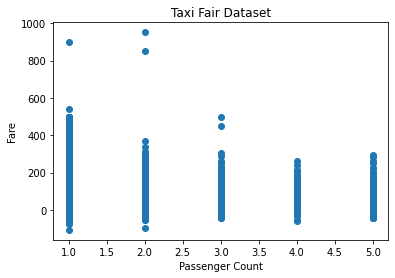

In [29]:
fig, ax = plt.subplots()
ax.scatter(df['passenger_count'].values, df['fare_amount'].values)
# set a title and labels
ax.set_title('Taxi Fair Dataset')
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Fare')
plt.show()

Text(0, 0.5, 'Frequency')

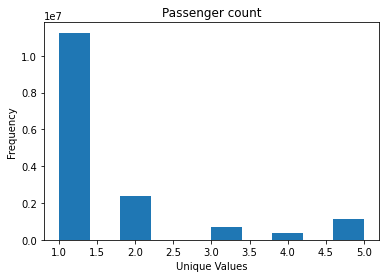

In [7]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['passenger_count'].values)
# set title and labels
ax.set_title('Passenger count')
ax.set_xlabel('Unique Values')
ax.set_ylabel('Frequency')

## As you can see people mostly like to travel alone or with a partner

5518

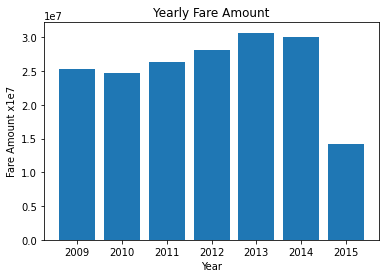

In [15]:
years = df['year'].unique()
fare = []
for year in years:
    fare.append(df.loc[df["year"] == year, 'fare_amount'].sum())
fig, ax = plt.subplots()
ax.set_title("Yearly Fare Amount")
ax.set_xlabel("Year")
ax.set_ylabel("Fare Amount x1e7")
ax.bar(years, fare)

del fare
gc.collect()

105567

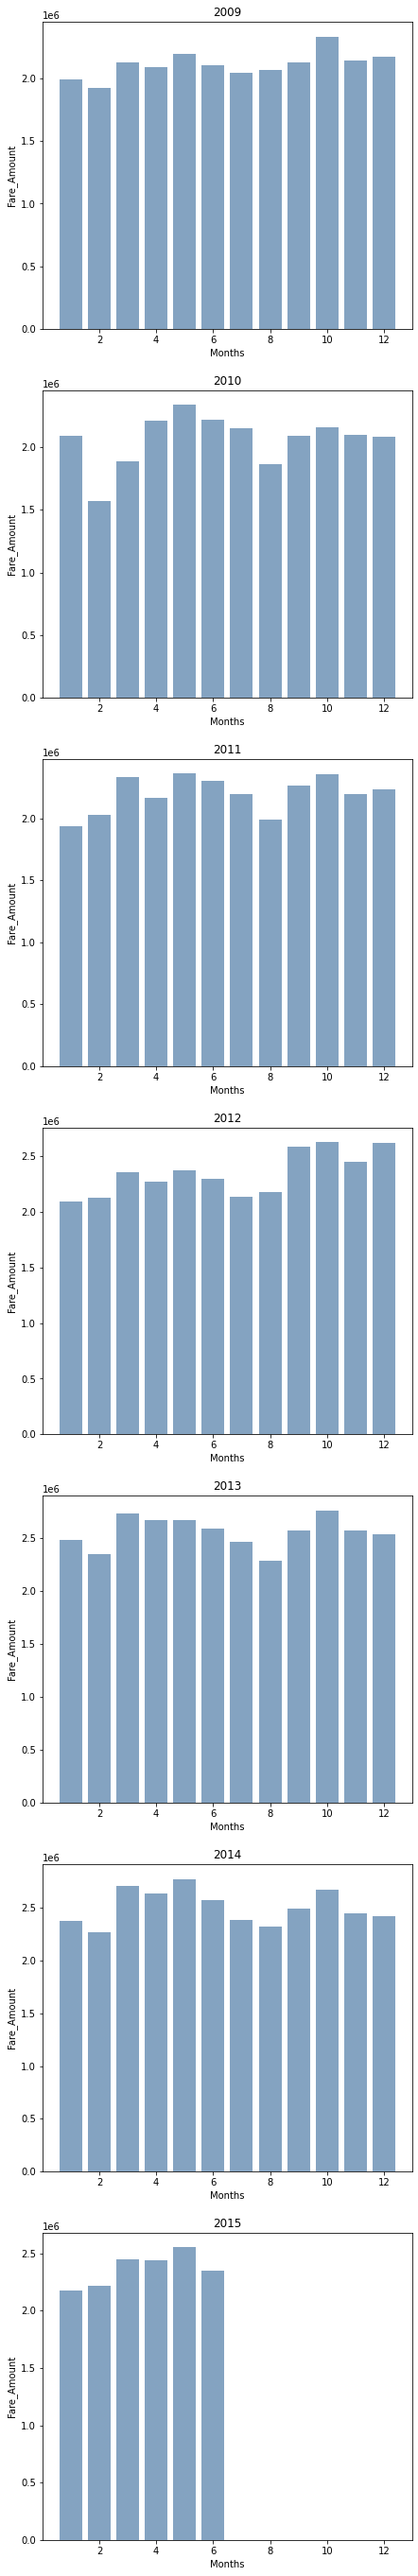

In [46]:
years = df['year'].unique()
months = df['month'].unique()
colors = 'r b g m y c s'
yearly_fare = dict()
fig, ax = plt.subplots(len(years), figsize=(len(years), len(years)**2))


for year in years:
    monthly_fare = []
    for month in months:
        monthly_fare.append(df['fare_amount'].loc[(df["year"] == year) & (df["month"] == month)].sum())
    yearly_fare.update({year : monthly_fare})
    
for i in range(len(years)):
    ax[i].set_title(str(years[i]))
    ax[i].set_xlabel('Months')
    ax[i].set_ylabel('Fare_Amount')
    ax[i].bar(months, yearly_fare[years[i]], color = (0.2, 0.4, 0.6, 0.6))
    
del yearly_fare, monthly_fare, fig, ax
gc.collect()

### Pickup Locations across NYC

D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  import sys
D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


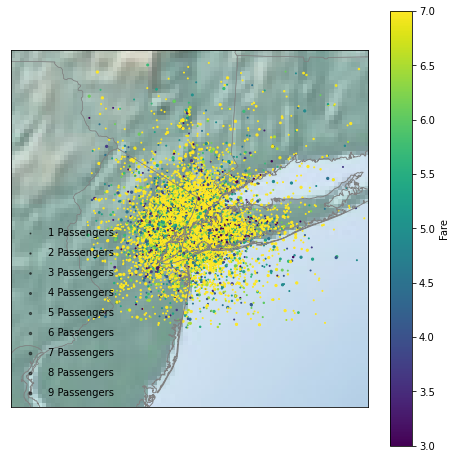

In [8]:
# Extract the data we're interested in
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=df['pickup_latitude'].mean(), lon_0=df['pickup_longitude'].mean(),
            width=0.3E6, height=0.3E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting Fare_Amount
# and size reflecting area
m.scatter(df['pickup_longitude'].values, df['pickup_latitude'].values, latlon=True,
          c=df['fare_amount'].values, s=df['passenger_count'].values)

# 3. create colorbar and legend
plt.colorbar(label=r'Fare')
plt.clim(3, 7)

 
for a in [1, 2, 3, 4, 5, 6 , 7, 8 ,9]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' Passengers')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

## Dropoff Locations Across NYC

D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  import sys
D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  


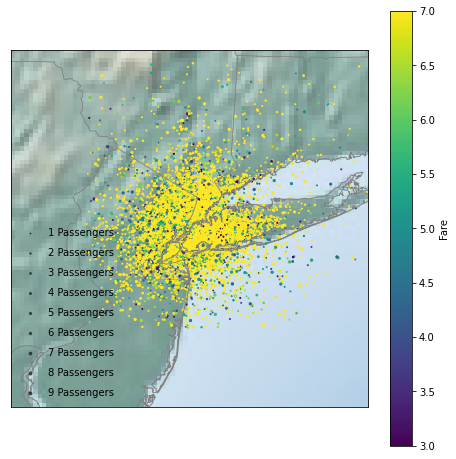

In [9]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=df['dropoff_latitude'].mean(), lon_0=df['dropoff_longitude'].mean(),
            width=0.3E6, height=0.3E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting Fare_Amount
# and size reflecting area
m.scatter(df['dropoff_longitude'].values, df['dropoff_latitude'].values, latlon=True,
          c=df['fare_amount'].values, s=df['passenger_count'].values)

# 3. create colorbar and legend
plt.colorbar(label=r'Fare')
plt.clim(3, 7)

 
for a in [1, 2, 3, 4, 5, 6 , 7, 8 ,9]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' Passengers')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

## 3D plot for Dropoff lats and longs wrt fare

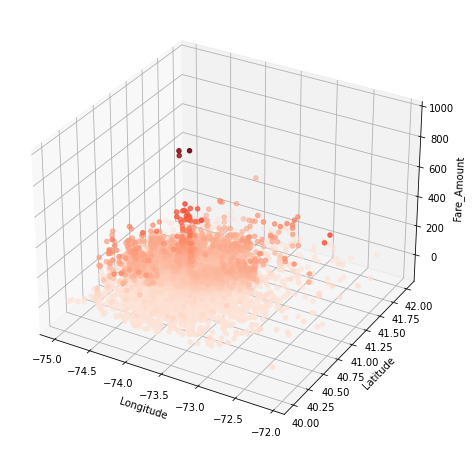

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Fare_Amount")
ax.scatter3D(df['dropoff_longitude'].values, df['dropoff_latitude'].values, df['fare_amount'].values,
             c=df['fare_amount'].values, cmap='Reds');
plt.show()

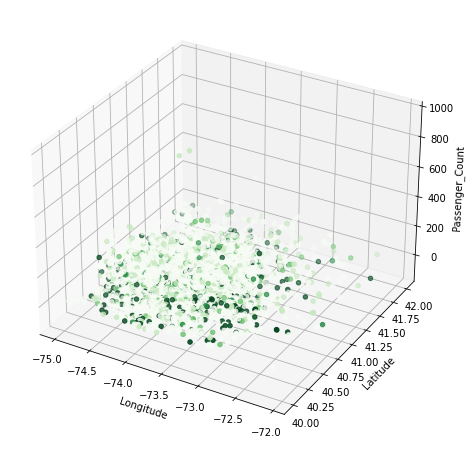

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Passenger_Count")
ax.scatter3D(df['dropoff_longitude'].values, df['dropoff_latitude'].values, df['fare_amount'].values,
             c=df['passenger_count'].values, cmap='Greens');
plt.show()

## Adding a new feature to our Dataset(Distance)

In [15]:
import math
def toRadians(degree):
    
    # cmath library in C++
    # defines the constant
    # M_PI as the value of
    # pi accurate to 1e-30
    one_deg = (math.pi) / 180
    return one_deg * degree
 
def distance(lats_longs):
    if(np.shape(lats_longs)[0] != 4):
        print("Error Shape : ", np.shape(lats_longs))
        return
    lat1, long1,lat2, long2 = lats_longs
    # Convert the latitudes
    # and longitudes   
    # from degree to radians.
    lat1 =  toRadians(lat1)
    long1 = toRadians(long1)
    lat2 =  toRadians(lat2)
    long2 = toRadians(long2)
    # Haversine Formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    
    ans = pow(math.sin(dlat / 2), 2) + math.cos(lat1) * math.cos(lat2) * math.pow(math.sin(dlong / 2), 2)
    ans = 2 * math.asin(math.sqrt(ans))
    
    # Radius of Earth in
    # Kilometers, R = 6371
    # Use R = 3956 for miles
    R = 6371
    
    # Calculate the result
    ans = ans * R
    return ans

In [20]:
df['Distance'] = list(map(distance, np.concatenate([df['pickup_latitude'].values[..., np.newaxis],
                                                    df['pickup_longitude'].values[..., np.newaxis],
                                                    df['dropoff_latitude'].values[..., np.newaxis],
                                                    df['dropoff_longitude'].values[..., np.newaxis]], axis = -1)))

In [ ]:
df['Fare_per_KM'] = df['fair_amount'] / df['Distance']

In [ ]:
df, NAlist = reduce_mem_usage(df)
df.head()

Memory usage of properties dataframe is : 681.2740020751953  MB
******************************
Column:  fare_amount
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  pickup_longitude
dtype before:  float32


D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  import sys
D:\Anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  


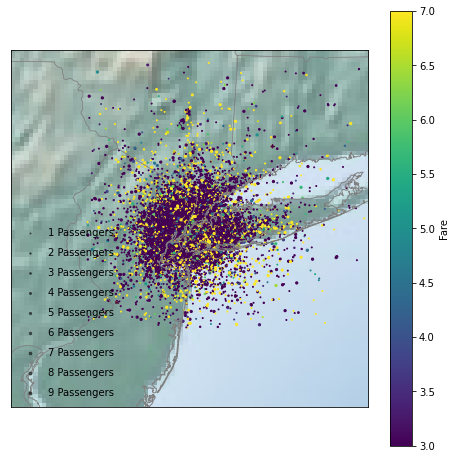

In [24]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=df['pickup_latitude'].mean(), lon_0=df['pickup_longitude'].mean(),
            width=0.3E6, height=0.3E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting Fare_Amount
# and size reflecting area
m.scatter(df['pickup_longitude'].values, df['pickup_latitude'].values, latlon=True,
          c=df['Distance'].values, s=df['passenger_count'].values)

# 3. create colorbar and legend
plt.colorbar(label=r'Distance')
plt.clim(3, 7)

 
for a in [1, 2, 3, 4, 5, 6 , 7, 8 ,9]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' Passengers')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');